In [175]:
## import libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler


In [230]:
## Load the Data
test_data = pd.read_csv('test.csv')
train_data = pd.read_csv('train.csv')

In [229]:
train_data.head() 

,Survived,Pclass,Sex,Age,Embarked
0,0,3,0,22.0,0.0
1,1,1,1,38.0,1.0
2,1,3,1,26.0,0.0
3,1,1,1,35.0,0.0
4,0,3,0,35.0,0.0


In [231]:
## preprocessing the data
train_data = train_data[['Survived','Pclass','Sex','Age','Embarked']]
train_data['Sex']=train_data['Sex'].map({'male':0, 'female':1})
train_data['Embarked']= train_data['Embarked'].map({'S':0,'C':1,'Q':2})
train_data.head()


,Survived,Pclass,Sex,Age,Embarked
0,0,3,0,22.0,0.0
1,1,1,1,38.0,1.0
2,1,3,1,26.0,0.0
3,1,1,1,35.0,0.0
4,0,3,0,35.0,0.0


In [232]:
## select the dependent and independet variables

train_data_to_use = train_data.iloc[:,1:5]
train_data_to_target= train_data_to_use.iloc[:,0]

In [233]:
train_data_to_use

,Pclass,Sex,Age,Embarked
0,3,0,22.0,0.0
1,1,1,38.0,1.0
2,3,1,26.0,0.0
3,1,1,35.0,0.0
4,3,0,35.0,0.0
...,...,...,...,...
886,2,0,27.0,0.0
887,1,1,19.0,0.0
888,3,1,NaN,0.0
889,1,0,26.0,1.0


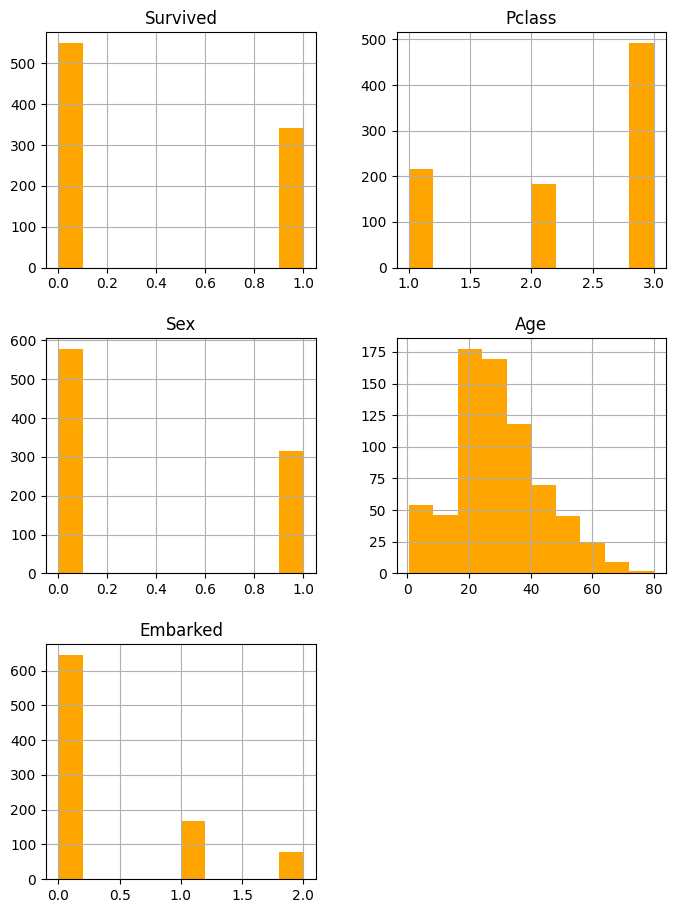

In [234]:
## Visualise the traine data 
train_data.hist(figsize=(8,11), color = 'orange')
plt.show()

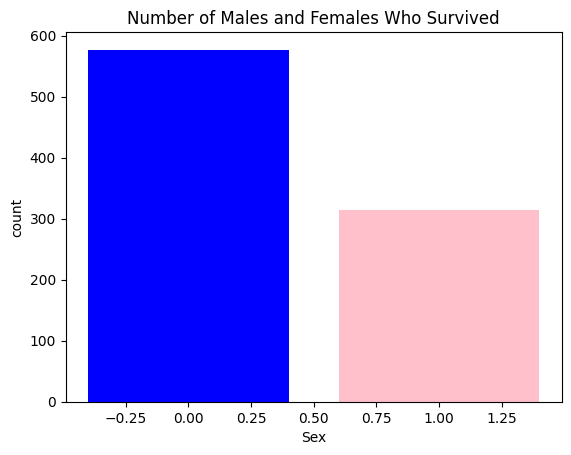

<Figure size 800x600 with 0 Axes>

In [227]:
## visualising the count number of males and females who survived
survived_count= train_data['Sex'].value_counts()
## create a bar chart
plt.bar(survived_count.index, survived_count.values, color = colors)
## create the bar chart title and labels
plt.title('Number of Males and Females Who Survived')
plt.xlabel('Sex')
plt.ylabel('count')
plt.figure(figsize=(8,6),)
colors = ['blue', 'pink']
plt.show()

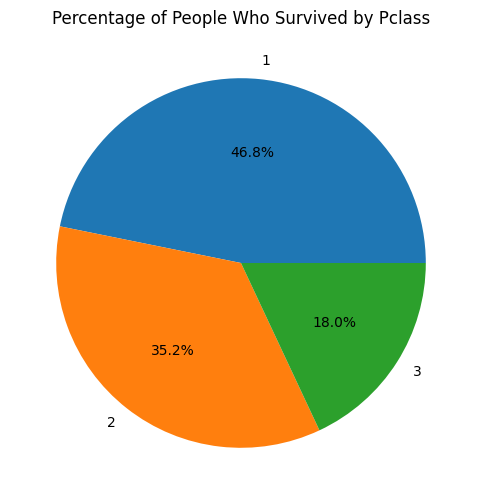

In [228]:
# Group the data by Pclass and calculate the percentage of people who survived in each class
survival_percentage = train_data.groupby('Pclass')['Survived'].mean() * 100

# Set figure size
plt.figure(figsize=(8, 6))

# Create a pie chart of the survival percentage for each Pclass
plt.pie(survival_percentage, labels=survival_percentage.index, autopct='%1.1f%%')

# Set chart title
plt.title('Percentage of People Who Survived by Pclass')

# Display the chart
plt.show()


In [161]:
## Spliting data into test and train sets
x = train_data[['Pclass','Sex','Age','Embarked']]
y = train_data[['Survived']]
x_train,x_test,y_train,y_test= train_test_split(x,y, test_size= 90 , random_state=33)


In [203]:
# Scale the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)
y_test_scaled = scaler.fit_transform (y_test)
y_train_scaled= scaler.fit_transform(y_train)


In [199]:
x_train_scaled

array([[ 0.82631012, -0.74116329,  0.40377736, -0.57859411],
       [ 0.82631012,  1.34923035, -1.5947866 ,  0.97796042],
       [-0.38148989, -0.74116329,  2.09486995,  2.53451495],
       ...,
       [-0.38148989, -0.74116329, -0.36490109, -0.57859411],
       [ 0.82631012, -0.74116329, -0.67237247, -0.57859411],
       [-0.38148989, -0.74116329,  0.40377736, -0.57859411]])

In [205]:
x_train_scaled

array([[ 0.82631012, -0.74116329,  0.40377736, -0.57859411],
       [ 0.82631012,  1.34923035, -1.5947866 ,  0.97796042],
       [-0.38148989, -0.74116329,  2.09486995,  2.53451495],
       ...,
       [-0.38148989, -0.74116329, -0.36490109, -0.57859411],
       [ 0.82631012, -0.74116329, -0.67237247, -0.57859411],
       [-0.38148989, -0.74116329,  0.40377736, -0.57859411]])

In [206]:
## create instance of the Logistic Regression model
lreg_model = LogisticRegression()



In [207]:
## train the Logistic Regression Model
lreg_model.fit(x_train,y_train)

/Users/admin/Desktop/LREG/.conda/lib/python3.11/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [208]:
## make predictions on the test set
y_pred = lreg_model.predict(x_test)

In [210]:
## display results in a dataframe
import pandas as pd

results ={'Actual_Survived':y_test_scaled, 'Predicted_Survived':y_pred}
print(results)


{'Actual_Survived': array([[-0.85485041],
       [-0.85485041],
       [-0.85485041],
       [-0.85485041],
       [ 1.1697953 ],
       [ 1.1697953 ],
       [ 1.1697953 ],
       [ 1.1697953 ],
       [-0.85485041],
       [ 1.1697953 ],
       [ 1.1697953 ],
       [ 1.1697953 ],
       [-0.85485041],
       [-0.85485041],
       [-0.85485041],
       [-0.85485041],
       [-0.85485041],
       [-0.85485041],
       [ 1.1697953 ],
       [ 1.1697953 ],
       [-0.85485041],
       [-0.85485041],
       [-0.85485041],
       [ 1.1697953 ],
       [-0.85485041],
       [-0.85485041],
       [ 1.1697953 ],
       [-0.85485041],
       [-0.85485041],
       [-0.85485041],
       [ 1.1697953 ],
       [-0.85485041],
       [-0.85485041],
       [-0.85485041],
       [-0.85485041],
       [-0.85485041],
       [-0.85485041],
       [ 1.1697953 ],
       [-0.85485041],
       [-0.85485041],
       [ 1.1697953 ],
       [-0.85485041],
       [-0.85485041],
       [ 1.1697953 ],
       [ 1.1

In [220]:
## Evaluate the model
print ('Accuracy',metrics.accuracy_score(y_test,y_pred) )
## The accuracy of the model on the test set is 0.75, indicating that the model predicted the survival
# of passengers correctly 75% of the time.



Accuracy 0.7555555555555555


In [214]:
## confusion Matrix
conf_mat = confusion_matrix (y_test,y_pred)
conf_mat

array([[45,  7],
       [15, 23]])

In [201]:
## calculate the Accuracy based of the confusion Matrix
Accuracy = (conf_mat[0][0]+conf_mat[1][1]/25)
Accuracy 
# The confusion matrix shows the number of true positives, true negatives, false positives, 
# and false negatives. The accuracy based on the confusion matrix is calculated as 45.92, which seems incorrect. 
# It appears that there is an error in the calculation of the accuracy based on the confusion matrix.


45.92

In [215]:
## calculate R-squared
r2 = r2_score(y_test_scaled,y_pred)
## Calculate mwan absolute error 
mae= mean_absolute_error(y_test_scaled,y_pred)

In [216]:
print ('R-squared:', r2)

# The R-squared value is 0.1316, which suggests that the logistic regression model explains only about 13.16% of
#  the variance in the target variable.


R-squared: 0.13158531302137577


In [217]:
mae
# The mean absolute error is 0.8100, indicating that, on average, the model's predictions differ
# from the actual values by 0.81.


0.8100493675952388

In [218]:
## predict probabilities for each data point
probs= lreg_model.predict_proba(x_test)[:,1]

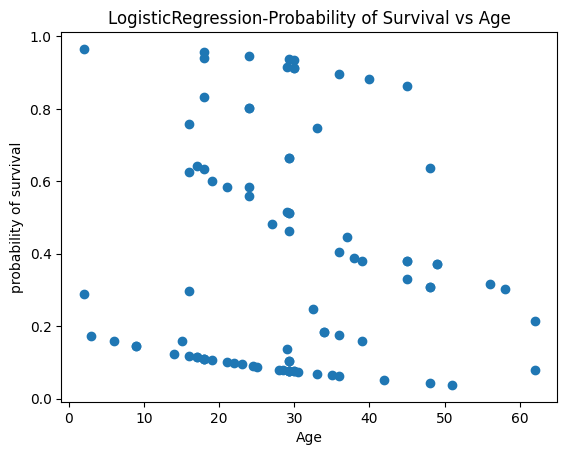

In [219]:
## create a scatter plot 
plt.scatter(x_test['Age'],probs)
plt.xlabel ('Age')
plt.ylabel('probability of survival')
plt.title('LogisticRegression-Probability of Survival vs Age')
plt.show ()

In [ ]:
# Overall, the model's accuracy is decent, but there might be room for improvement in terms of explaining 
# the variance in the target variable and reducing the prediction errors.

